<a href="https://colab.research.google.com/github/sagar2582/Capstone-2-Seoul-Bike-Sharing-Demand-Prediction/blob/main/Seoul_Bike_Sharing_Demand_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <b><u> Project Title : Seoul Bike Sharing Demand Prediction </u></b>

## <b> Problem Description </b>

### Currently Rental bikes are introduced in many urban cities for the enhancement of mobility comfort. It is important to make the rental bike available and accessible to the public at the right time as it lessens the waiting time. Eventually, providing the city with a stable supply of rental bikes becomes a major concern. The crucial part is the prediction of bike count required at each hour for the stable supply of rental bikes.

## <b> Data Description </b>

### <b> The dataset contains weather information (Temperature, Humidity, Windspeed, Visibility, Dewpoint, Solar radiation, Snowfall, Rainfall), the number of bikes rented per hour and date information.</b>


### <b>Attribute Information: </b>

* ### Date : year-month-day
* ### Rented Bike count - Count of bikes rented at each hour
* ### Hour - Hour of he day
* ### Temperature-Temperature in Celsius
* ### Humidity - %
* ### Windspeed - m/s
* ### Visibility - 10m
* ### Dew point temperature - Celsius
* ### Solar radiation - MJ/m2
* ### Rainfall - mm
* ### Snowfall - cm
* ### Seasons - Winter, Spring, Summer, Autumn
* ### Holiday - Holiday/No holiday
* ### Functional Day - NoFunc(Non Functional Hours), Fun(Functional hours)

In [1]:
# Importing Libraries

import numpy as np
import pandas as pd
from numpy import math

import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Connecting to Drive to import the dataset

from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [60]:
df = pd.read_csv('/content/drive/My Drive/Colab Notebooks/Regression Project/SeoulBikeData.csv', encoding= 'unicode_escape')

### Data Inspection 

In [164]:
# First Look

df.head()

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
0,01/12/2017,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
1,01/12/2017,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
2,01/12/2017,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes
3,01/12/2017,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
4,01/12/2017,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes


In [165]:
print("The shape of our dataset is : ", df.shape)

The shape of our dataset is :  (8760, 14)


In [166]:
rows = df.shape[0]
columns = df.shape[1]

print(f"Our dataset has {rows} and {columns} columns")

Our dataset has 8760 and 14 columns


In [167]:
df.tail()

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
8755,30/11/2018,1003,19,4.2,34,2.6,1894,-10.3,0.0,0.0,0.0,Autumn,No Holiday,Yes
8756,30/11/2018,764,20,3.4,37,2.3,2000,-9.9,0.0,0.0,0.0,Autumn,No Holiday,Yes
8757,30/11/2018,694,21,2.6,39,0.3,1968,-9.9,0.0,0.0,0.0,Autumn,No Holiday,Yes
8758,30/11/2018,712,22,2.1,41,1.0,1859,-9.8,0.0,0.0,0.0,Autumn,No Holiday,Yes
8759,30/11/2018,584,23,1.9,43,1.3,1909,-9.3,0.0,0.0,0.0,Autumn,No Holiday,Yes


In [168]:
# Check for Null values

df.isnull().sum().sort_values(ascending = False)

Functioning Day              0
Holiday                      0
Seasons                      0
Snowfall (cm)                0
Rainfall(mm)                 0
Solar Radiation (MJ/m2)      0
Dew point temperature(°C)    0
Visibility (10m)             0
Wind speed (m/s)             0
Humidity(%)                  0
Temperature(°C)              0
Hour                         0
Rented Bike Count            0
Date                         0
dtype: int64

In [169]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 14 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Date                       8760 non-null   object 
 1   Rented Bike Count          8760 non-null   int64  
 2   Hour                       8760 non-null   int64  
 3   Temperature(°C)            8760 non-null   float64
 4   Humidity(%)                8760 non-null   int64  
 5   Wind speed (m/s)           8760 non-null   float64
 6   Visibility (10m)           8760 non-null   int64  
 7   Dew point temperature(°C)  8760 non-null   float64
 8   Solar Radiation (MJ/m2)    8760 non-null   float64
 9   Rainfall(mm)               8760 non-null   float64
 10  Snowfall (cm)              8760 non-null   float64
 11  Seasons                    8760 non-null   object 
 12  Holiday                    8760 non-null   object 
 13  Functioning Day            8760 non-null   objec

In [170]:
# Check for duplicate values

len(df[df.duplicated()])

0

In [171]:
df.describe()

,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm)
count,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000
mean,704.602055,11.500000,12.882922,58.226256,1.724909,1436.825799,4.073813,0.569111,0.148687,0.075068
std,644.997468,6.922582,11.944825,20.362413,1.036300,608.298712,13.060369,0.868746,1.128193,0.436746
min,0.000000,0.000000,-17.800000,0.000000,0.000000,27.000000,-30.600000,0.000000,0.000000,0.000000
25%,191.000000,5.750000,3.500000,42.000000,0.900000,940.000000,-4.700000,0.000000,0.000000,0.000000
50%,504.500000,11.500000,13.700000,57.000000,1.500000,1698.000000,5.100000,0.010000,0.000000,0.000000
75%,1065.250000,17.250000,22.500000,74.000000,2.300000,2000.000000,14.800000,0.930000,0.000000,0.000000
max,3556.000000,23.000000,39.400000,98.000000,7.400000,2000.000000,27.200000,3.520000,35.000000,8.800000


In [172]:
df.describe(include = 'all')

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
count,8760,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760,8760,8760
unique,365,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4,2,2
top,03/10/2018,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Spring,No Holiday,Yes
freq,24,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2208,8328,8465
mean,NaN,704.602055,11.500000,12.882922,58.226256,1.724909,1436.825799,4.073813,0.569111,0.148687,0.075068,NaN,NaN,NaN
std,NaN,644.997468,6.922582,11.944825,20.362413,1.036300,608.298712,13.060369,0.868746,1.128193,0.436746,NaN,NaN,NaN
min,NaN,0.000000,0.000000,-17.800000,0.000000,0.000000,27.000000,-30.600000,0.000000,0.000000,0.000000,NaN,NaN,NaN
25%,NaN,191.000000,5.750000,3.500000,42.000000,0.900000,940.000000,-4.700000,0.000000,0.000000,0.000000,NaN,NaN,NaN
50%,NaN,504.500000,11.500000,13.700000,57.000000,1.500000,1698.000000,5.100000,0.010000,0.000000,0.000000,NaN,NaN,NaN
75%,NaN,1065.250000,17.250000,22.500000,74.000000,2.300000,2000.000000,14.800000,0.930000,0.000000,0.000000,NaN,NaN,NaN


In [173]:
df.columns

Index(['Date', 'Rented Bike Count', 'Hour', 'Temperature(°C)', 'Humidity(%)',
       'Wind speed (m/s)', 'Visibility (10m)', 'Dew point temperature(°C)',
       'Solar Radiation (MJ/m2)', 'Rainfall(mm)', 'Snowfall (cm)', 'Seasons',
       'Holiday', 'Functioning Day'],
      dtype='object')

In [174]:
len(df.Date.unique())

365

In [175]:
df.Seasons.value_counts()

Spring    2208
Summer    2208
Autumn    2184
Winter    2160
Name: Seasons, dtype: int64

In [176]:
df.Holiday.value_counts()

No Holiday    8328
Holiday        432
Name: Holiday, dtype: int64

In [177]:
df['Functioning Day'].value_counts()

Yes    8465
No      295
Name: Functioning Day, dtype: int64

### Insights of the above inspection :
1) Our dataset has 8760 and 14 columns

2) We have 0 Duplicate and 0 NULL values

3) We have four (object) Dtypes, six (float) Dtypes and four (int) Dtypes

4) Our Dependent variable is "Rented Bike Count"

5) We have 4 Seasons and count of number of holidays and Non-Functional Days is also obtained

# Pre-Processing of Data 
## Hunt for the Outliers is on

In [178]:
# First we will create a copy of our dataset

df_copy = df.copy()

In [179]:
# Storing Numerical features in one single list

list_numerical_features = ['Rented Bike Count','Temperature(°C)', 'Humidity(%)','Wind speed (m/s)', 'Visibility (10m)', 'Dew point temperature(°C)','Solar Radiation (MJ/m2)', 'Rainfall(mm)', 'Snowfall (cm)']

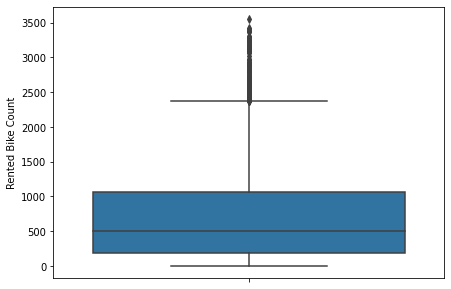

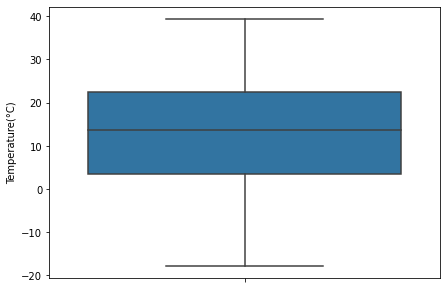

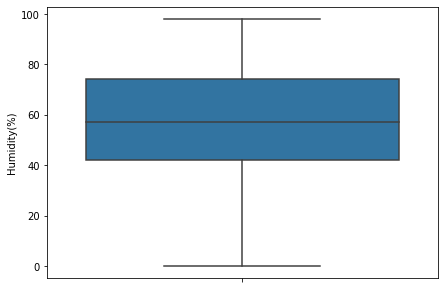

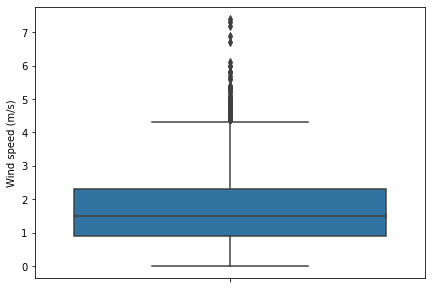

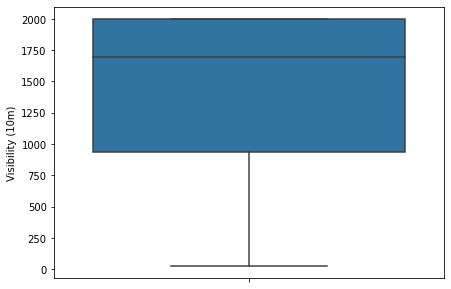

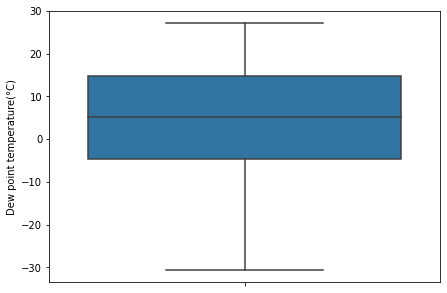

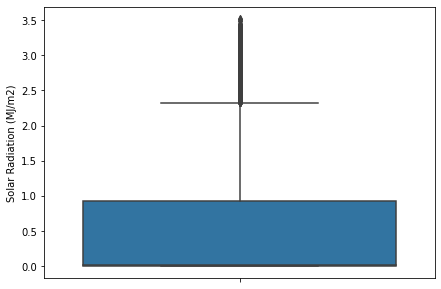

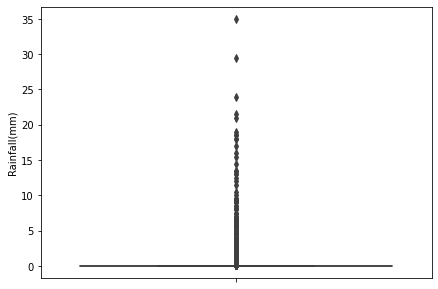

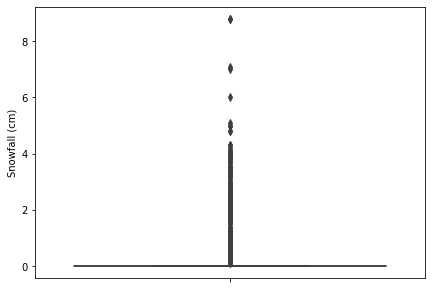

In [180]:
for col in list_numerical_features:
  plt.figure(figsize= (7,5))
  sns.boxplot(y= df_copy[col])

Our dependent variable itself is a stockpile of outliers and other factors like wind, rain should not be considered as of natural factors

In [181]:
df_copy.shape

(8760, 14)

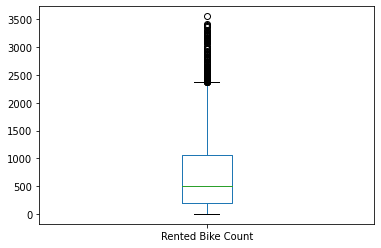

In [182]:
df['Rented Bike Count'].plot(kind='box')

We should be dealing with this using the Inter-Quartile-Range method of removing outliers, for that we need to find Q1 and Q3. And with the help of it we will calculate IQR.

In [183]:
Q1 = df_copy['Rented Bike Count'].quantile(0.25)
Q3 = df_copy['Rented Bike Count'].quantile(0.75)
IQR = Q3 - Q1

In [184]:
# The outliers are :

df_copy[(df_copy['Rented Bike Count'] < Q1-1.5*IQR) | (df_copy['Rented Bike Count'] > Q3+1.5*IQR)]

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
2946,02/04/2018,2401,18,20.7,54,4.1,1484,11.0,0.50,0.0,0.0,Spring,No Holiday,Yes
2994,04/04/2018,2402,18,16.0,47,2.1,2000,4.6,0.79,0.0,0.0,Spring,No Holiday,Yes
3114,09/04/2018,2401,18,14.8,24,1.3,1514,-5.6,0.69,0.0,0.0,Spring,No Holiday,Yes
3210,13/04/2018,2404,18,17.5,18,1.3,2000,-7.1,0.23,0.0,0.0,Spring,No Holiday,Yes
3282,16/04/2018,2692,18,17.0,28,3.1,2000,-1.6,0.88,0.0,0.0,Spring,No Holiday,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7746,19/10/2018,2631,18,16.6,40,2.4,2000,2.9,0.11,0.0,0.0,Autumn,No Holiday,Yes
7818,22/10/2018,2613,18,17.3,43,0.9,783,4.5,0.08,0.0,0.0,Autumn,No Holiday,Yes
7842,23/10/2018,2415,18,14.5,71,2.1,1235,9.2,0.06,0.0,0.0,Autumn,No Holiday,Yes
7866,24/10/2018,2612,18,15.1,53,1.7,2000,5.5,0.06,0.0,0.0,Autumn,No Holiday,Yes


In [185]:
# The total number of outliers are : 

df_copy[(df_copy['Rented Bike Count'] < Q1-1.5*IQR) | (df_copy['Rented Bike Count'] > Q3+1.5*IQR)]['Rented Bike Count'].count()

158

In [186]:
# Removing the outliers

not_outliers = (df_copy['Rented Bike Count'] >= Q1-1.5*IQR) & (df_copy['Rented Bike Count'] <= Q3+1.5*IQR)
df_copy = df_copy.loc[not_outliers]

In [187]:
df_copy.shape

(8602, 14)

### We have successfully removed the outliers. The rows have reduced from 8760 - 8602 in numbers.

#### Extracting day, month and year from Date column

In [188]:
df_copy.head(1)

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
0,01/12/2017,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes


In [189]:
df_copy['Date'] = pd.to_datetime(df_copy['Date'])

In [190]:
df_copy.head(1)

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
0,2017-01-12,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes


In [191]:
# Creating columns for Day, Month & Year

df_copy['Year'] = df_copy['Date'].dt.year
df_copy['Month'] = df_copy['Date'].dt.month
df_copy['Day'] = df_copy['Date'].dt.day 

In [192]:
# Drop the main Date column as we no longer need it

df_copy.drop('Date', axis = 1, inplace = True)

In [193]:
df_copy.head(1)

,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day,Year,Month,Day
0,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,2017,1,12


In [194]:
df_copy['Rented Bike Count'].value_counts().sort_index(ascending = True)

0       295
2         3
3         2
4         5
5         3
       ... 
2368      2
2369      1
2370      1
2372      2
2375      1
Name: Rented Bike Count, Length: 2024, dtype: int64

#### Since there are 295 Non-Functional days, therefore; the Rented bike is 0 on those days.

# Exploratory Data Analysis

In [195]:
# Storing all the numeric features seperately

numeric_features = ['Rented Bike Count','Hour', 'Temperature(°C)', 'Humidity(%)','Wind speed (m/s)', 'Visibility (10m)', 'Dew point temperature(°C)','Solar Radiation (MJ/m2)', 'Rainfall(mm)', 'Snowfall (cm)']

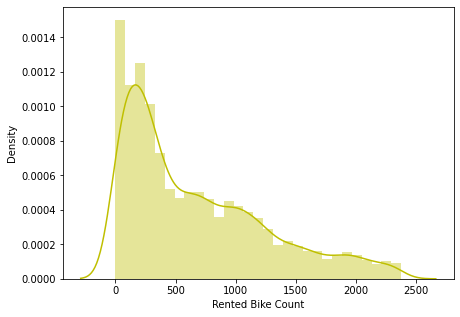

In [196]:
# Dependent variable
plt.figure(figsize=(7,5))
sns.distplot(df_copy['Rented Bike Count'], color = 'y')

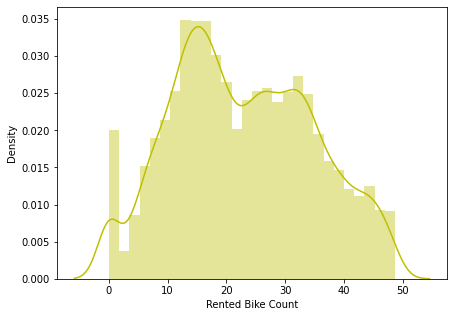

In [197]:
# Its a slightly rightSkewed hence using SQRT to make it a standard distribution

plt.figure(figsize=(7,5))
sns.distplot(np.sqrt(df_copy['Rented Bike Count']), color = 'y')

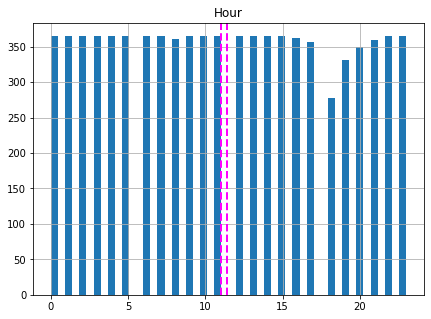

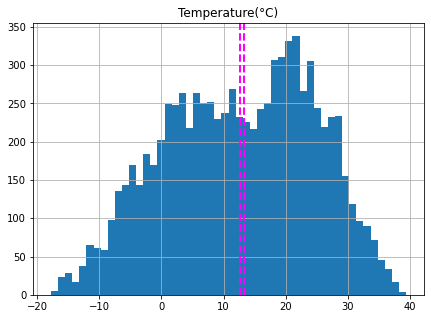

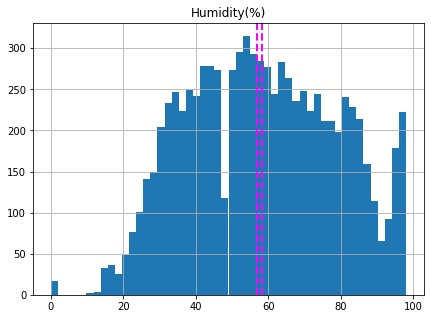

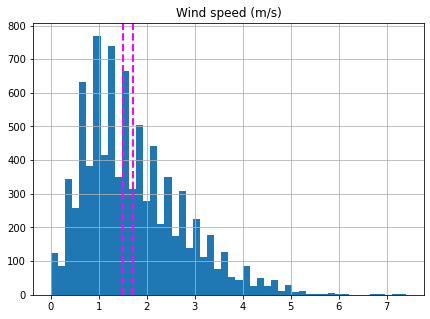

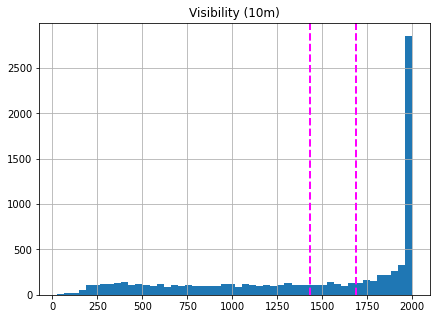

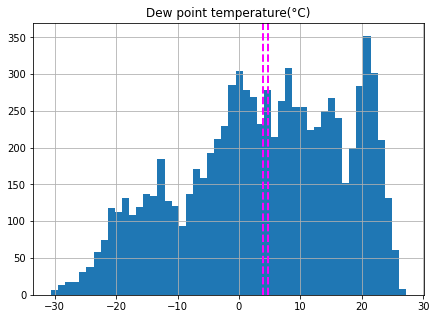

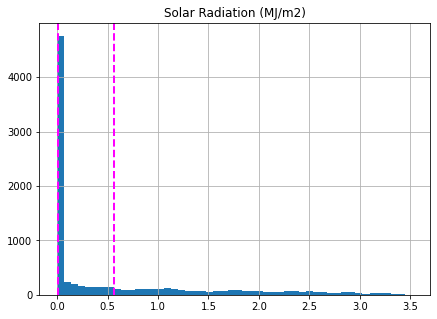

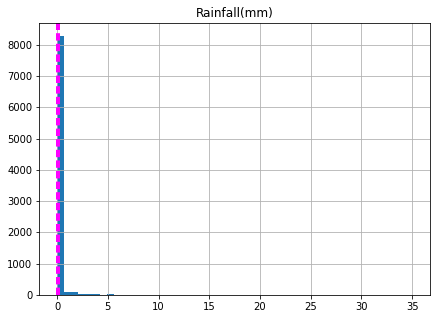

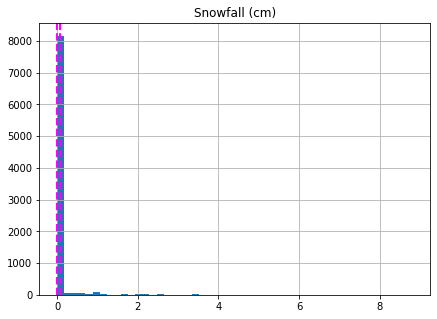

In [198]:
# Distributon check for numerical features 

for col in numeric_features[1:]:
  fig = plt.figure(figsize=(7,5))
  ax = fig.gca()
  feature = df_copy[col]
  feature.hist(bins=50, ax=ax)
  ax.set_title(col)
  ax.axvline(feature.mean(), color = 'magenta', linestyle = 'dashed', linewidth = 2)
  ax.axvline(feature.median(), color = 'magenta', linestyle = 'dashed', linewidth = 2)
plt.show()

#### Rest of the features don't need seprate standardization 

In [199]:
# Renaming columns for the ease of use :


df_copy.rename(columns={'Rented Bike Count': 'RentedBikeCount','Wind speed (m/s)':'WindSpeed','Visibility (10m)':'Visibility','Dew point temperature(°C)': 'DewPointTemperature', 'Solar Radiation (MJ/m2)':'SolarRadiation',
                   'Rainfall(mm)':'Rainfall','Snowfall (cm)':'Snowfall','Functioning Day':'FunctioningDay','Temperature(°C)':'Temperature','Humidity(%)':'Humidity'}, inplace=True)

In [200]:
df_copy.head(1)

,RentedBikeCount,Hour,Temperature,Humidity,WindSpeed,Visibility,DewPointTemperature,SolarRadiation,Rainfall,Snowfall,Seasons,Holiday,FunctioningDay,Year,Month,Day
0,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,2017,1,12


### Looking for some insight through Visualization

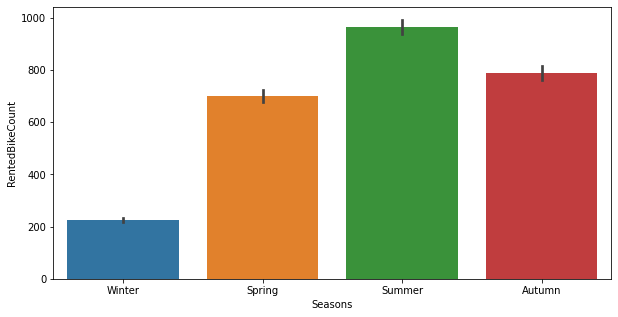

In [201]:
plt.figure(figsize=(10,5))
sns.barplot(df_copy['Seasons'], df_copy['RentedBikeCount'])
plt.show()

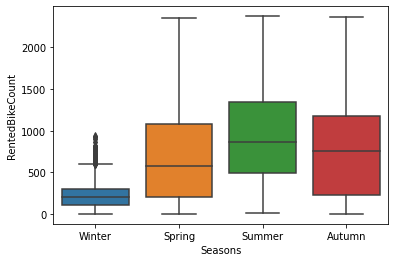

In [202]:
sns.boxplot(x = df_copy['Seasons'], y = df_copy['RentedBikeCount'])
plt.show()

-> Summer Season was the most favorable and popular for the most Rented Bike Count as shown above

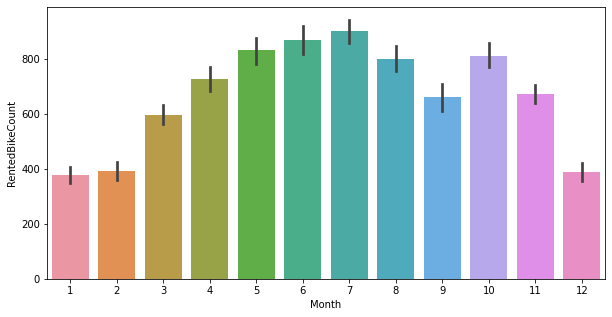

In [203]:
plt.figure(figsize=(10,5))
sns.barplot(df_copy['Month'], df_copy['RentedBikeCount'])

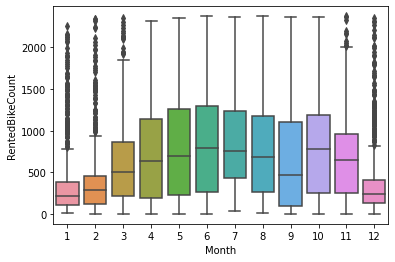

In [204]:
sns.boxplot(x = df_copy['Month'], y = df_copy['RentedBikeCount'])
plt.show()

Since Summer Spring are the best seasons among others for a bike ride, we see that the number of rented bikes increase drastically from 4th month to 8th month. Making it the most demanding season for the bike count.

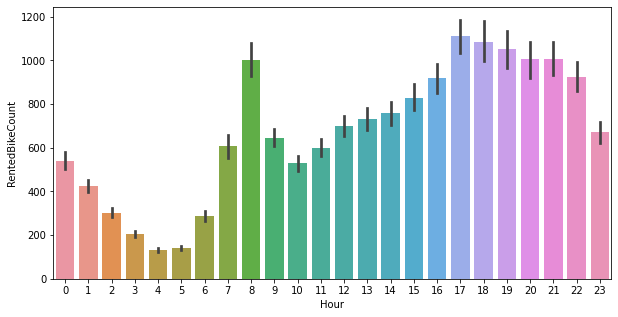

In [205]:
plt.figure(figsize=(10,5))
sns.barplot(df_copy['Hour'], df_copy['RentedBikeCount'])

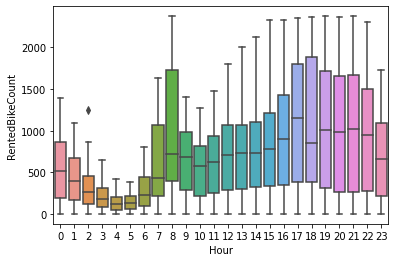

In [206]:
sns.boxplot(x = df_copy['Hour'], y = df_copy['RentedBikeCount'])
plt.show()

From the above 2 graphs we notice that the activity spike during 7-9 hour of the day (i.e., when most of the offices start working) and another spike is from 16-21 hours (i.e., is the time when people after work go back to there home) 

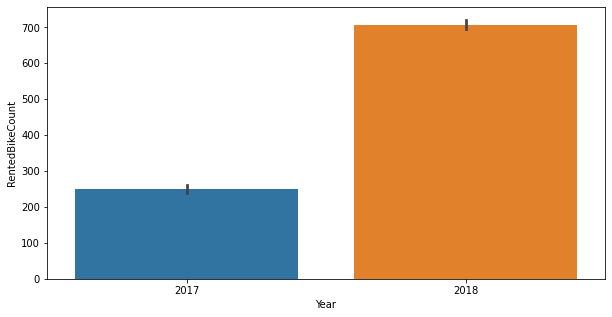

In [207]:
# Yearly Pattern

plt.figure(figsize=(10,5))
sns.barplot(df_copy['Year'], df_copy['RentedBikeCount'])

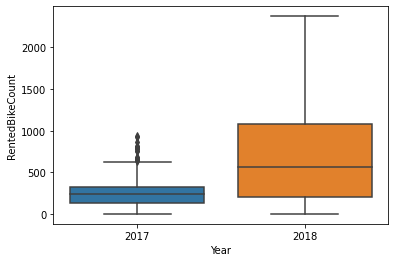

In [208]:

sns.boxplot(x = df_copy['Year'], y = df_copy['RentedBikeCount'])
plt.show()

### The adoption of the rental bikes have drastically increased over the span of an year

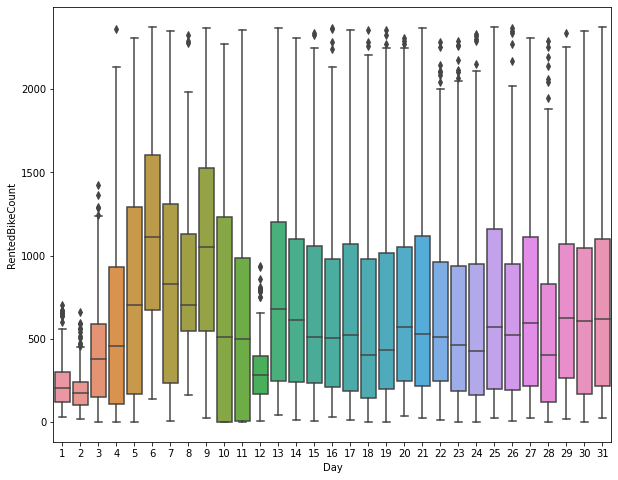

In [209]:
plt.figure(figsize=(10,8))
sns.boxplot(x="Day", y="RentedBikeCount", data=df_copy)
plt.show()

## Feature Engineering - Label Encoding

We saw that there was a drastic change in yearly trend from 2017 - 2018. We have to do something about it and need to categories accordingly. 
So we will provide labels/weights to the years and create bins.
The year earlier will get lower weightage compared to the one which had spikes in the rental bike count.

Since; there are 4 seasons I'll assume and create bins of 3 months each - Thus; each year will have 4 bins

In [210]:
# Creating a fuction that will take 'Month' & 'Year' as input and return 4 bins of each year

#creating function
def Year_bins(month,year):

  if (year==2017) and (month<=3):
    return 1
  elif (year==2017) and (month>3) and (month<=6):
    return 2
  elif (year==2017) and (month>6) and (month<=9):
    return 3
  elif (year==2017) and (month>9) and (month<=12):
    return 4
  elif (year==2018) and (month<=3):
    return 5
  elif (year==2018) and (month>3) and (month<=6):
    return 6
  elif (year==2018) and (month>6) and (month<=9):
    return 7
  else:
    return 8

In [211]:
# Creating a new column in our dataframe 

df_copy['Yearly_bins'] = df_copy.apply(lambda x:Year_bins(x.Month, x.Year), axis = 1)

In [212]:
# Dropping Date and Year columns as they are of no use now

df_copy.drop('Month',axis=1,inplace=True)
df_copy.drop('Year',axis=1,inplace=True)

In [213]:
df_copy.head(2)

,RentedBikeCount,Hour,Temperature,Humidity,WindSpeed,Visibility,DewPointTemperature,SolarRadiation,Rainfall,Snowfall,Seasons,Holiday,FunctioningDay,Day,Yearly_bins
0,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,12,1
1,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,12,1


### One Hot Encoding for Seasons, Functional Days & Holidays

In [214]:
# Creating dummies for Seasons

df_copy = pd.get_dummies(data = df_copy, columns = ['Seasons'], prefix = ['Season'], drop_first = False) 

In [215]:
df_copy.head(2)

,RentedBikeCount,Hour,Temperature,Humidity,WindSpeed,Visibility,DewPointTemperature,SolarRadiation,Rainfall,Snowfall,Holiday,FunctioningDay,Day,Yearly_bins,Season_Autumn,Season_Spring,Season_Summer,Season_Winter
0,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,No Holiday,Yes,12,1,0,0,0,1
1,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,No Holiday,Yes,12,1,0,0,0,1


In [216]:
# Creating Dummines for functional days

def func_days(var):
  if var == 'Yes':
    return 1
  else:
    return 0

# This above function will return '1' when the FunctioningDay == 'Yes' and will return '0' when FunctioningDay = 'No'.

In [217]:
df_copy['FunctioningDay'] = df_copy['FunctioningDay'].apply(func_days)

In [219]:
df_copy['FunctioningDay'].value_counts()

1    8307
0     295
Name: FunctioningDay, dtype: int64

In [218]:
df_copy.head(2)

,RentedBikeCount,Hour,Temperature,Humidity,WindSpeed,Visibility,DewPointTemperature,SolarRadiation,Rainfall,Snowfall,Holiday,FunctioningDay,Day,Yearly_bins,Season_Autumn,Season_Spring,Season_Summer,Season_Winter
0,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,No Holiday,1,12,1,0,0,0,1
1,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,No Holiday,1,12,1,0,0,0,1


In [223]:
# Creating Dummy variables for the 'Holiday' column 

def return_holiday(var):
  if var == 'No Holiday':
    return 1
  else:
    return 0

# This function will return '0' during the "holiday" and will return '1' during normal "working day"

In [224]:
df_copy['Holiday'] = df_copy['Holiday'].apply(return_holiday)

In [226]:
df_copy['Holiday'].value_counts()

1    8171
0     431
Name: Holiday, dtype: int64

In [227]:
df_copy.head(2)

,RentedBikeCount,Hour,Temperature,Humidity,WindSpeed,Visibility,DewPointTemperature,SolarRadiation,Rainfall,Snowfall,Holiday,FunctioningDay,Day,Yearly_bins,Season_Autumn,Season_Spring,Season_Summer,Season_Winter
0,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,1,1,12,1,0,0,0,1
1,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,1,1,12,1,0,0,0,1


We are pretty much done in assinging the Dummy variables and now its time for the final transformation of our dependent variable and linearity checks 

#### We had above figured out that our dependent varible was slightly Right-Skewed and upon "Square-Root-Transformation" we were able to achieve near close to standard distribution.

In [231]:
# Transforming our Dependent variable

df_copy['RentedBikeCount'] = np.sqrt(df_copy['RentedBikeCount'])

# Overwritting, since we do not need the older values anymore

### Linearity Check

In [234]:
Linearity_check_list = ['Temperature', 'Humidity','WindSpeed', 'Visibility', 'DewPointTemperature','SolarRadiation', 'Rainfall', 'Snowfall']

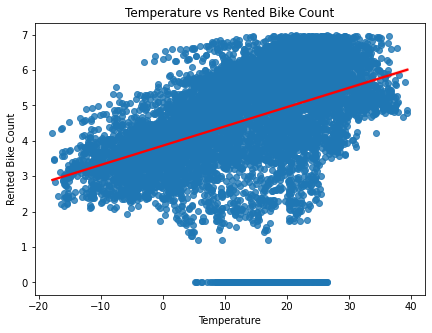

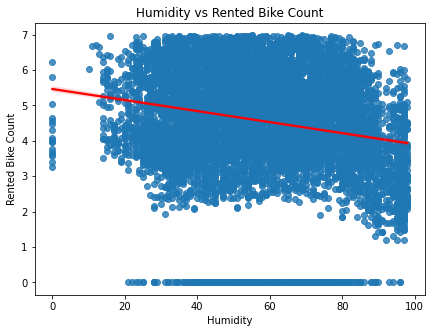

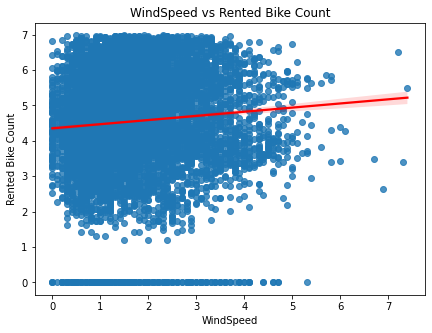

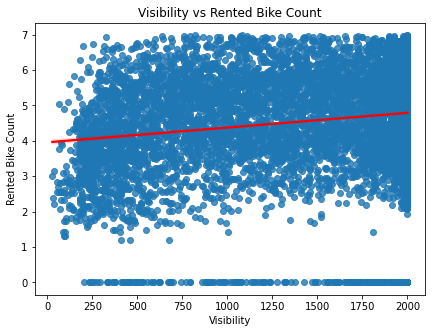

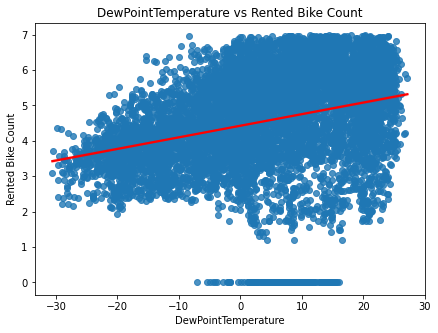

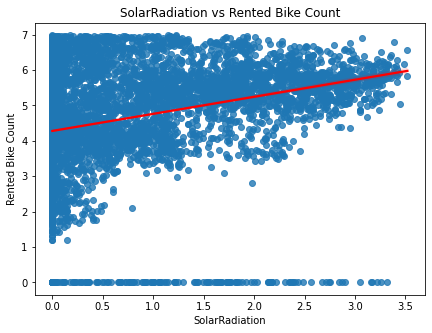

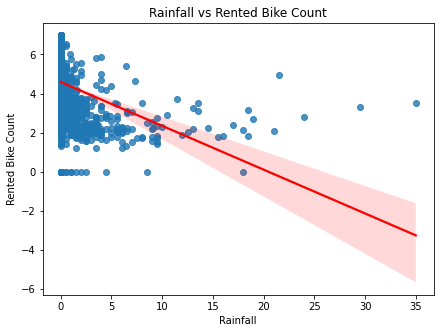

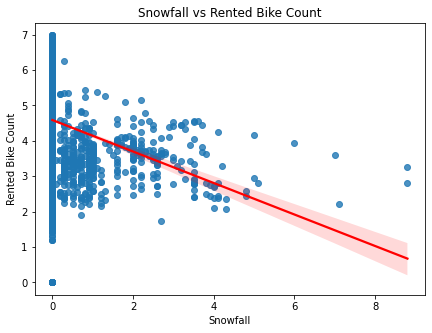

In [239]:
for col in Linearity_check_list:
  fig = plt.figure(figsize=(7,5))
  sns.regplot(x = df_copy[col], y = df_copy['RentedBikeCount'],  line_kws={"color": "red"})
  plt.title(col+' vs Rented Bike Count')
  plt.xlabel(col)
  plt.ylabel('Rented Bike Count')
plt.show()

## Multicollinearity Check

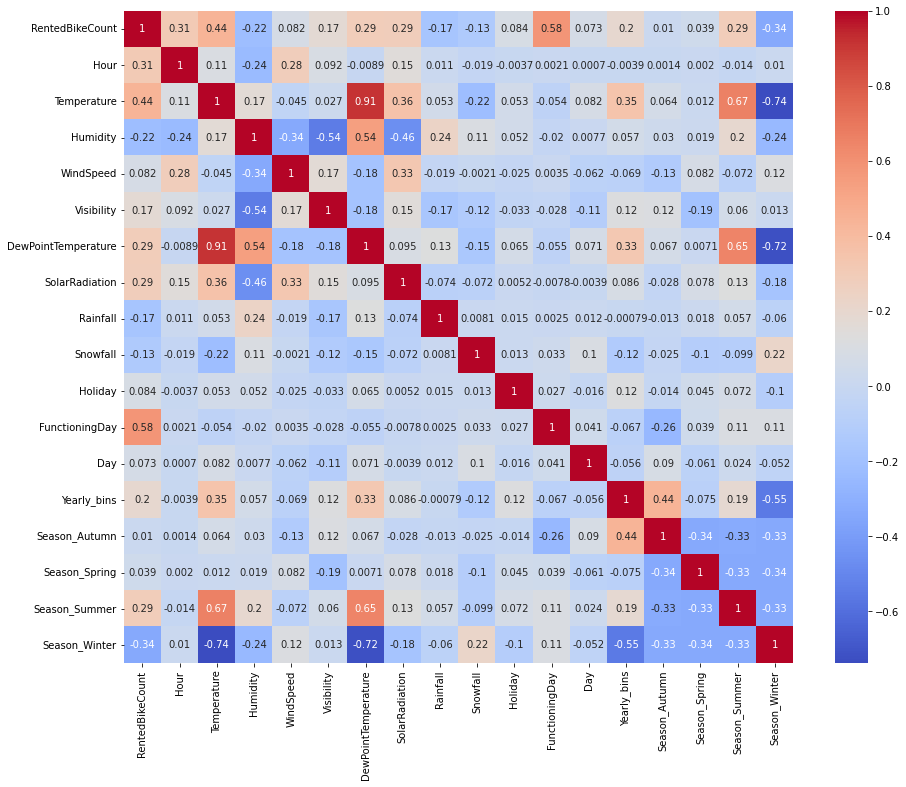

In [240]:
plt.figure(figsize=(15,12))
sns.heatmap(df_copy.corr(), annot=True, cmap = 'coolwarm')
plt.show()

From the above Heatmap we notice a few important things regarding multicollinearity.

1) Temperature and dew point temperature are highly corelated to each other

2) Also Summer and Winter season are higly corelated to both temperature and dew point temperature

3) We will be dropping off DewPointTemperature, Season_Summer, Season_Winter 

In [241]:
# We will check for multicollinearity using the variance inflation factor

# Importing the VIF library

from statsmodels.stats.outliers_influence import variance_inflation_factor

def calc_vif(X):

    # Calculating VIF
    vif = pd.DataFrame()
    vif["features"] = X.columns
    vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

    return(vif)

In [247]:
X = df_copy.iloc[:,1:]
calc_vif(X)

,features,VIF
0,Hour,4.110726
1,Temperature,3.589616
2,Humidity,15.285881
3,WindSpeed,4.749735
4,Visibility,8.292304
5,SolarRadiation,2.567268
6,Rainfall,1.085593
7,Snowfall,1.160860
8,Holiday,18.422159
9,FunctioningDay,25.024978


In [ ]:
df_copy.drop('DewPointTemperature',axis=1,inplace=True)
df_copy.drop('Season_Summer',axis=1,inplace=True)
df_copy.drop('Season_Winter',axis=1,inplace=True)

In [250]:
X = df_copy.iloc[:,1:]
calc_vif(X)

,features,VIF
0,Hour,4.110726
1,Temperature,3.589616
2,Humidity,15.285881
3,WindSpeed,4.749735
4,Visibility,8.292304
5,SolarRadiation,2.567268
6,Rainfall,1.085593
7,Snowfall,1.160860
8,Holiday,18.422159
9,FunctioningDay,25.024978


In [252]:
calc_vif(df_copy[[col for col in df_copy.describe().columns if col not in ['Holiday','Yearly_bins','RentedBikeCount','FunctioningDay']]])

,features,VIF
0,Hour,3.893526
1,Temperature,3.225009
2,Humidity,6.311110
3,WindSpeed,4.686867
4,Visibility,5.031425
5,SolarRadiation,2.332679
6,Rainfall,1.081153
7,Snowfall,1.158011
8,Day,3.857796
9,Season_Autumn,1.554766


In [254]:
df_copy.describe()

,RentedBikeCount,Hour,Temperature,Humidity,WindSpeed,Visibility,SolarRadiation,Rainfall,Snowfall,Holiday,FunctioningDay,Day,Yearly_bins,Season_Autumn,Season_Spring
count,8602.000000,8602.000000,8602.000000,8602.000000,8602.000000,8602.000000,8602.000000,8602.000000,8602.000000,8602.000000,8602.000000,8602.000000,8602.000000,8602.000000,8602.000000
mean,4.555158,11.377122,12.674890,58.372937,1.716124,1431.978958,0.568715,0.151407,0.076447,0.949895,0.965706,15.726924,6.163799,0.249709,0.252848
std,1.473774,6.920938,11.937911,20.455133,1.038349,610.175009,0.874273,1.138328,0.440620,0.218174,0.181995,8.814799,1.375378,0.432870,0.434670
min,0.000000,0.000000,-17.800000,0.000000,0.000000,27.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000
25%,3.702879,5.000000,3.200000,42.000000,0.900000,929.000000,0.000000,0.000000,0.000000,1.000000,1.000000,8.000000,5.000000,0.000000,0.000000
50%,4.692837,11.000000,13.300000,57.000000,1.500000,1689.500000,0.010000,0.000000,0.000000,1.000000,1.000000,16.000000,6.000000,0.000000,0.000000
75%,5.666153,17.000000,22.200000,74.000000,2.300000,2000.000000,0.930000,0.000000,0.000000,1.000000,1.000000,23.000000,7.000000,0.000000,1.000000
max,6.980972,23.000000,39.400000,98.000000,7.400000,2000.000000,3.520000,35.000000,8.800000,1.000000,1.000000,31.000000,8.000000,1.000000,1.000000


From the above visualized linearity graph and we will be categorising the values of Snowfall, rainfall and solar radiation to cover atleast above 75 percent of the values and remove the bais.


In [255]:
df_copy['SolarRadiation'] = df_copy['SolarRadiation'].apply(lambda x:1 if x>=0.95 else 0)
df_copy['Rainfall'] = df_copy['Rainfall'].apply(lambda x:1 if x>=1.14 else 0)
df_copy['Snowfall'] = df_copy['Snowfall'].apply(lambda x:1 if x>=0.07 else 0)

In [257]:
df_copy.head(2)

,RentedBikeCount,Hour,Temperature,Humidity,WindSpeed,Visibility,SolarRadiation,Rainfall,Snowfall,Holiday,FunctioningDay,Day,Yearly_bins,Season_Autumn,Season_Spring
0,3.992165,0,-5.2,37,2.2,2000,0,0,0,1,1,12,1,0,0
1,3.779267,1,-5.5,38,0.8,2000,0,0,0,1,1,12,1,0,0


## Applying Machine Learning Models

### Linear Regression

In [298]:
#importing library 
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score,mean_squared_error
import warnings
warnings.filterwarnings('ignore')

In [299]:
X = df_copy[['Hour','Temperature','Humidity','WindSpeed','Visibility','SolarRadiation','Rainfall','Snowfall','Holiday','FunctioningDay','Day','Yearly_bins','Season_Autumn','Season_Spring']]
y = df_copy['RentedBikeCount']

In [300]:
# Splitting the dataset into train and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [301]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(6881, 14)
(1721, 14)
(6881,)
(1721,)


Transformation has become neccessary as the data was underfitting and resulting in very low MSE and RMSE score

In [302]:
# Transforming data
#scaler=MinMaxScaler()
#X_train=scaler.fit_transform(X_train)
#X_test=scaler.transform(X_test)

In [303]:
# Fitting Linear Regression to the Training set
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression()

In [304]:
regressor.coef_

array([ 4.67506767e-02,  5.92480793e-02, -1.34176017e-02, -8.30567923e-03,
        1.24139566e-05, -7.46487856e-02, -1.81016756e+00, -7.81423543e-03,
        3.36632426e-01,  5.17195104e+00, -8.87372430e-05,  6.24970855e-03,
        5.75341905e-01,  2.76169422e-01])

In [305]:
regressor.intercept_

-1.4382416515900012

In [315]:
y_test[1:10]

3154    0.000000
140     3.712688
6375    5.378750
7654    6.091630
3764    6.250124
7575    6.029869
7907    2.710806
6673    5.229683
1642    3.528442
Name: RentedBikeCount, dtype: float64

In [316]:
y_pred_test[1:10]

array([-0.29483107,  3.8166658 ,  5.93075251,  5.4764353 ,  5.3430513 ,
        5.89827128,  4.77060605,  5.09754883,  3.42850233])

In [312]:
# Predicting the train set
y_pred_train = regressor.predict(X_train)
y_pred_train

array([3.42102027, 6.01698524, 6.19807469, ..., 4.49070202, 4.02068337,
       4.59275534])

In [313]:
# Predicting on test set
y_pred_test = regressor.predict(X_test)
y_pred_test

array([ 4.70068489, -0.29483107,  3.8166658 , ...,  4.33682456,
        4.63005169,  6.15398967])

### Evaluating Model on :

1) MSE

2) RMSE

3) R-Squared

4)Adjusted R-Squared

In [308]:
# Train data
MSE  =np.round(mean_squared_error(y_train*y_train,y_pred_train*y_pred_train),2)
print("MSE :" , MSE)
RMSE =np.round(np.sqrt(MSE),2)
print("RMSE :" ,RMSE)
r2 =np.round(r2_score(y_train*y_train,y_pred_train*y_pred_train),3)
print("R2 score:" ,r2)
A_r2=np.round(1-(1-r2_score(y_train*y_train,y_pred_train*y_pred_train))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)),3)
print("Adjusted R2 : ",A_r2)

MSE : 46.92
RMSE : 6.85
R2 score: 0.672
Adjusted R2 :  0.669


In [323]:
# Test data
MSE  =np.round(mean_squared_error(y_test*y_test,y_pred_test*y_pred_test),2)
print("MSE :" , MSE)
RMSE =np.round(np.sqrt(MSE),2)
print("RMSE :" ,RMSE)
r2 =np.round(r2_score(y_test*y_test,y_pred_test*y_pred_test),3)
print("R2 score:" ,r2)
A_r2=np.round(1-(1-r2_score(y_test*y_test,y_pred_test*y_pred_test))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)),3)
print("Adjusted R2 : ",A_r2)

MSE : 44.5
RMSE : 6.67
R2 score: 0.685
Adjusted R2 :  0.683


### Regularization 

In [324]:
# Lasso Regularization

from sklearn.linear_model import Lasso
lasso = Lasso(alpha=0.0001, max_iter=3000)

lasso.fit(X_train, y_train)

Lasso(alpha=0.0001, max_iter=3000)

In [325]:
lasso.score(X_train, y_train)

0.745947674212551

In [326]:
lasso.coef_

array([ 4.67465364e-02,  5.92447098e-02, -1.34200268e-02, -8.36550938e-03,
        1.25395303e-05, -7.38976040e-02, -1.80640659e+00, -5.73154782e-03,
        3.34554598e-01,  5.16809234e+00, -8.31591886e-05,  6.41879827e-03,
        5.73977124e-01,  2.75419384e-01])

In [320]:
from sklearn.model_selection import GridSearchCV
lasso = Lasso()
parameters = {'alpha': [1e-15,1e-13,1e-10,1e-8,1e-5,1e-4,1e-3,1e-2,1e-1,1,5,10,20,30,40,45,50,55,60,100,0.0014,0.001,0.005,0.01,0.05,0.1,0.5,1]}
lasso_regressor = GridSearchCV(lasso, parameters, scoring= 'neg_mean_squared_error', cv= 5)
lasso_regressor.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [1e-15, 1e-13, 1e-10, 1e-08, 1e-05, 0.0001,
                                   0.001, 0.01, 0.1, 1, 5, 10, 20, 30, 40, 45,
                                   50, 55, 60, 100, 0.0014, 0.001, 0.005, 0.01,
                                   0.05, 0.1, 0.5, 1]},
             scoring='neg_mean_squared_error')

In [321]:
print('The best fit alpha value is found out to be :' ,lasso_regressor.best_params_)
print('\nUsing', lasso_regressor.best_params_, ' the negative squared error is: ', lasso_regressor.best_score_)

The best fit alpha value is found out to be : {'alpha': 0.0001}

Using {'alpha': 0.0001}  the negative squared error is:  -0.5499904104039208


In [322]:
y_pred_lasso = lasso_regressor.predict(X_test)

In [327]:
# Test data
MSE  =np.round(mean_squared_error(y_test*y_test,y_pred_lasso*y_pred_lasso),2)
print("MSE :" , MSE)
RMSE =np.round(np.sqrt(MSE),2)
print("RMSE :" ,RMSE)
r2 =np.round(r2_score(y_test*y_test,y_pred_lasso*y_pred_lasso),3)
print("R2 score:" ,r2)
A_r2=np.round(1-(1-r2_score(y_test*y_test,y_pred_lasso*y_pred_lasso))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)),3)
print("Adjusted R2 : ",A_r2)

MSE : 44.51
RMSE : 6.67
R2 score: 0.685
Adjusted R2 :  0.683


## ElasticNet Regularization

In [328]:
from sklearn.linear_model import ElasticNet
elasticnet = ElasticNet(alpha=0.1, l1_ratio=0.5)

In [329]:
elasticnet.fit(X_train,y_train)

ElasticNet(alpha=0.1)

In [330]:
elasticnet.score(X_train, y_train)

0.49135304896244836

In [331]:
y_pred_en = elasticnet.predict(X_test)

In [332]:
elastic = ElasticNet()
parameters = {'alpha': [1e-15,1e-13,1e-10,1e-8,1e-5,1e-4,1e-3,1e-2,1e-1,1,5,10,20,30,40,45,50,55,60,100,0.001,0.005,0.01,0.05,0.1,0.5,1],'l1_ratio':[0.3,0.4,0.5,0.6,0.7,0.8]}
elastic_regressor = GridSearchCV(elastic, parameters, scoring='neg_mean_squared_error',cv=5)
elastic_regressor.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=ElasticNet(),
             param_grid={'alpha': [1e-15, 1e-13, 1e-10, 1e-08, 1e-05, 0.0001,
                                   0.001, 0.01, 0.1, 1, 5, 10, 20, 30, 40, 45,
                                   50, 55, 60, 100, 0.001, 0.005, 0.01, 0.05,
                                   0.1, 0.5, 1],
                         'l1_ratio': [0.3, 0.4, 0.5, 0.6, 0.7, 0.8]},
             scoring='neg_mean_squared_error')

In [333]:
print("The best fit alpha value is found out to be :" ,elastic_regressor.best_params_)
print("\nUsing ",elastic_regressor.best_params_, " the negative mean squared error is: ", elastic_regressor.best_score_)

The best fit alpha value is found out to be : {'alpha': 0.0001, 'l1_ratio': 0.8}

Using  {'alpha': 0.0001, 'l1_ratio': 0.8}  the negative mean squared error is:  -0.5499938113865864


In [334]:
y_pred_elastic = elastic_regressor.predict(X_test)

In [335]:
# Test data
MSE  =np.round(mean_squared_error(y_test*y_test,y_pred_elastic*y_pred_elastic),2)
print("MSE :" , MSE)
RMSE =np.round(np.sqrt(MSE),2)
print("RMSE :" ,RMSE)
r2 =np.round(r2_score(y_test*y_test,y_pred_elastic*y_pred_elastic),3)
print("R2 score:" ,r2)
A_r2=np.round(1-(1-r2_score(y_test*y_test,y_pred_elastic*y_pred_elastic))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)),3)
print("Adjusted R2 : ",A_r2)

MSE : 44.51
RMSE : 6.67
R2 score: 0.685
Adjusted R2 :  0.683


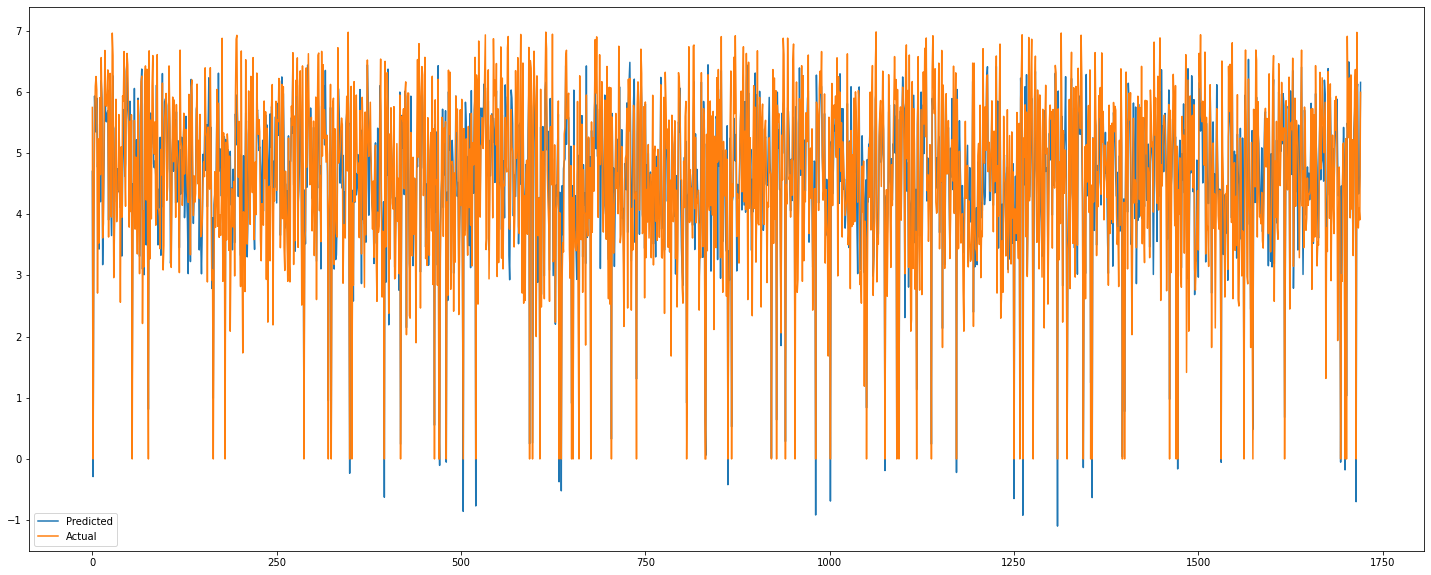

In [336]:
plt.figure(figsize=(25, 10))
plt.plot(y_pred_elastic)
plt.plot(np.array(y_test))
plt.legend(["Predicted","Actual"])
plt.show()

The performance is almost same for all regularization.

### Polynomial Regression

In [339]:
from sklearn.preprocessing import PolynomialFeatures
# Applying Polynomial Linear Regression
# degree 2
poly_reg = PolynomialFeatures(degree = 2,include_bias=True)
#Transforming into Polynomial
X_poly = poly_reg.fit_transform(X_train)
X_poly_test = poly_reg.fit_transform(X_test)
lin_reg = LinearRegression()
#Fitting the training dataset
lin_reg.fit(X_poly, y_train)

LinearRegression()

In [340]:
#Prediction on training & testing dataset
y_pred_poly_train = lin_reg.predict(X_poly)
y_pred_poly_test = lin_reg.predict(X_poly_test)

#### Evaluating Matrices

In [341]:
# Train data
MSE  =np.round(mean_squared_error(y_train*y_train,y_pred_poly_train*y_pred_poly_train),2)
print("MSE :" , MSE)
RMSE =np.round(np.sqrt(MSE),2)
print("RMSE :" ,RMSE)
r2 =np.round(r2_score(y_train*y_train,y_pred_poly_train*y_pred_poly_train),3)
print("R2 score:" ,r2)
A_r2=np.round(1-(1-r2_score(y_train*y_train,y_pred_poly_train*y_pred_poly_train))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)),3)
print("Adjusted R2 : ",A_r2)

MSE : 36.09
RMSE : 6.01
R2 score: 0.747
Adjusted R2 :  0.745


In [342]:
# Test data
MSE  =np.round(mean_squared_error(y_test*y_test,y_pred_poly_test*y_pred_poly_test),2)
print("MSE :" , MSE)
RMSE =np.round(np.sqrt(MSE),2)
print("RMSE :" ,RMSE)
r2 =np.round(r2_score(y_test*y_test,y_pred_poly_test*y_pred_poly_test),3)
print("R2 score:" ,r2)
A_r2=np.round(1-(1-r2_score(y_test*y_test,y_pred_poly_test*y_pred_poly_test))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)),3)
print("Adjusted R2 : ",A_r2)

MSE : 37.28
RMSE : 6.11
R2 score: 0.737
Adjusted R2 :  0.734


## Decision Tree Implementation


In [344]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_auc_score
from sklearn.model_selection import cross_val_score,cross_val_predict
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn import metrics

In [345]:
# train decision tree model

from sklearn.tree import DecisionTreeRegressor
dtr=DecisionTreeRegressor(max_depth=6,criterion='mse')

In [346]:
# model fiting

dtr.fit(X_train,y_train)

DecisionTreeRegressor(criterion='mse', max_depth=6)

In [351]:
#predicting on train and test data

y_predicted_train_tree = dtr.predict(X_train)
y_predicted_test_tree = dtr.predict(X_test)

In [347]:
# Training Score

dtr_score=dtr.score(X_train,y_train)
print('Accuracy of trained data :',dtr_score)

Accuracy of trained data : 0.8484157799539169


In [348]:
# Test Score

dtr1_score=dtr.score(X_test,y_test)
print('Accuracy of test data :',dtr1_score)

Accuracy of test data : 0.8459167473167575


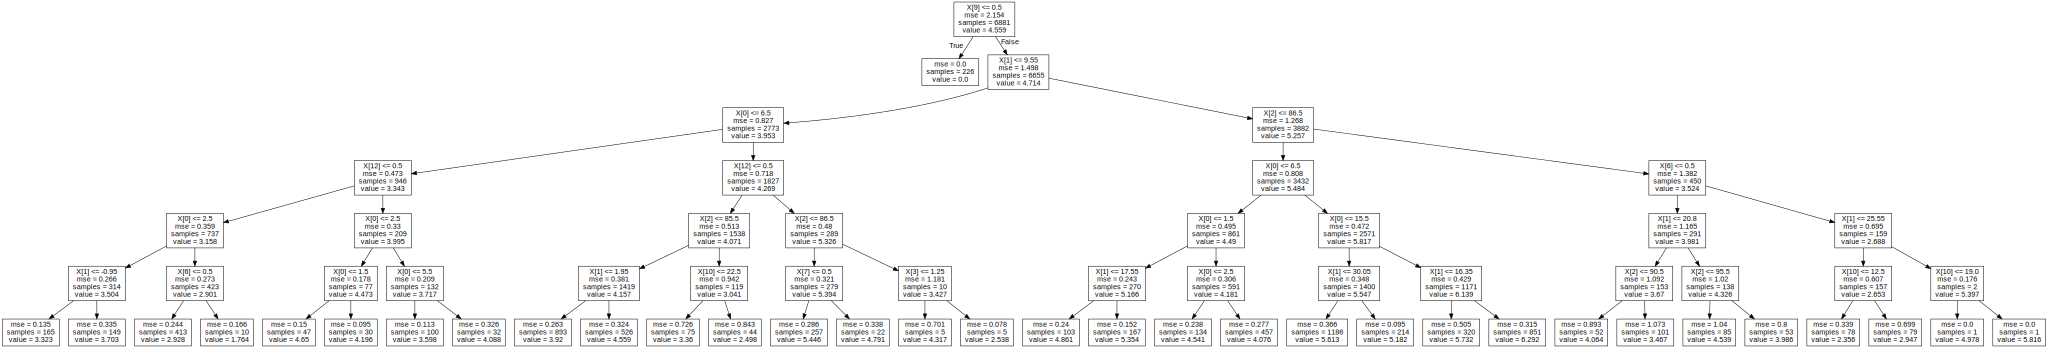

In [349]:
#Plot the learned model


from sklearn import tree
import pydot
import graphviz


dot_data = tree.export_graphviz(dtr, out_file=None) 
graph = graphviz.Source(dot_data) 
graph

In [352]:
#Evaluating metrices(Train)

MSE  =np.round(mean_squared_error(y_train*y_train,y_predicted_train_tree*y_predicted_train_tree))
print("MSE :" , MSE)
RMSE =np.round(np.sqrt(MSE))
print("RMSE :" ,RMSE)
r2 =np.round(r2_score(y_train*y_train,y_predicted_train_tree*y_predicted_train_tree),3)
print("R2 :" ,r2)
Adjusted_R2=np.round(1-(1-r2_score(y_train*y_train,y_predicted_train_tree*y_predicted_train_tree))*((X_train.shape[0]-1)/(X_train.shape[0]-X_train.shape[1]-1)),3)
print("Adjusted R2 : ",Adjusted_R2)

MSE : 29.0
RMSE : 5.0
R2 : 0.799
Adjusted R2 :  0.799


In [354]:
# Test data

MSE  =np.round(mean_squared_error(y_test*y_test,y_predicted_test_tree*y_predicted_test_tree),2)
print("MSE :" , MSE)
RMSE =np.round(np.sqrt(MSE),2)
print("RMSE :" ,RMSE)
r2 =np.round(r2_score(y_test*y_test,y_predicted_test_tree*y_predicted_test_tree),3)
print("R2 score:" ,r2)
A_r2=np.round(1-(1-r2_score(y_test*y_test,y_predicted_test_tree*y_predicted_test_tree))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)),3)
print("Adjusted R2 : ",A_r2)

MSE : 30.08
RMSE : 5.48
R2 score: 0.787
Adjusted R2 :  0.786


In [355]:
# Cross-Validation

parameters = {'max_depth' : [1,3,4,5,6,7,8,9,10,15,20], 'max_leaf_nodes':[5,10,15,20,25,30,40,45]}

dt_reg=DecisionTreeRegressor()

gridSearch_dt=GridSearchCV(dt_reg,parameters,scoring='r2',cv=6)
gridSearch_dt.fit(X_train,y_train)

GridSearchCV(cv=6, estimator=DecisionTreeRegressor(),
             param_grid={'max_depth': [1, 3, 4, 5, 6, 7, 8, 9, 10, 15, 20],
                         'max_leaf_nodes': [5, 10, 15, 20, 25, 30, 40, 45]},
             scoring='r2')

In [356]:
gridSearch_dt.best_params_

{'max_depth': 9, 'max_leaf_nodes': 45}

In [357]:
gridSearch_dt.best_score_

0.8476763392168865

In [358]:
#prediction on train and test data

gridSearch_dt_y_train_pred = gridSearch_dt.predict(X_train)
gridSearch_dt_y_test_pred = gridSearch_dt.predict(X_test)

### Evaluating Metrics

In [359]:
#Evaluating metrices(Train)

MSE  =np.round(mean_squared_error(y_train*y_train,gridSearch_dt_y_train_pred*gridSearch_dt_y_train_pred))
print("MSE :" , MSE)
RMSE =np.round(np.sqrt(MSE))
print("RMSE :" ,RMSE)
r2 =np.round(r2_score(y_train*y_train,gridSearch_dt_y_train_pred*gridSearch_dt_y_train_pred),3)
print("R2 :" ,r2)
Adjusted_R2=np.round(1-(1-r2_score(y_train*y_train,gridSearch_dt_y_train_pred*gridSearch_dt_y_train_pred))*((X_train.shape[0]-1)/(X_train.shape[0]-X_train.shape[1]-1)),3)
print("Adjusted R2 : ",Adjusted_R2)

MSE : 24.0
RMSE : 5.0
R2 : 0.832
Adjusted R2 :  0.832


In [360]:
# Test data

MSE  =np.round(mean_squared_error(y_test*y_test,gridSearch_dt_y_test_pred*gridSearch_dt_y_test_pred),2)
print("MSE :" , MSE)
RMSE =np.round(np.sqrt(MSE),2)
print("RMSE :" ,RMSE)
r2 =np.round(r2_score(y_test*y_test,gridSearch_dt_y_test_pred*gridSearch_dt_y_test_pred),3)
print("R2 score:" ,r2)
A_r2=np.round(1-(1-r2_score(y_test*y_test,gridSearch_dt_y_test_pred*gridSearch_dt_y_test_pred))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)),3)
print("Adjusted R2 : ",A_r2)

MSE : 26.36
RMSE : 5.13
R2 score: 0.814
Adjusted R2 :  0.812
